In [1]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [39]:
require 'gnuplot'
require 'utils.MnistManager'
require 'models.Vae'
require 'optim'
require 'cunn'
require 'image'
Plot = require 'itorch.Plot'
cmd = {h_size = 400, z_size = 1}

In [3]:
N = 50
data = MnistManager(50):cuda()
saved = torch.load('save/Vae.t7')
vae = saved.vae

# Image Reconstruction

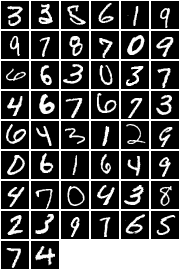

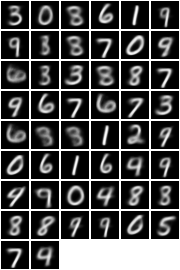

In [4]:
data:shuffle()
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(input:reshape(N, 1, 28, 28))
-- reconstructed image
itorch.image(recon:reshape(N, 1, 28, 28))

# Encoding Distribution

In [21]:
data:shuffle(1000)
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
--     plt = Plot()
--     plt:circle(mu[{{},1}], mu[{{},2}], '#00F0F0')
--     plt:title("Distribution")
--     plt:draw()

In [23]:
plt = Plot()
mu = mulv[{{},1}]:clone():double()
plt:histogram(mu)
plt:title("hist")
plt:draw()

# Image Generation

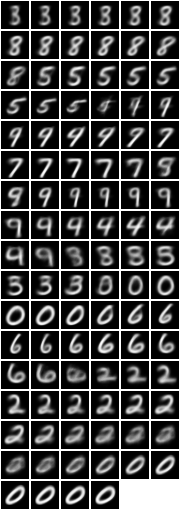

In [52]:
N = 100
z = torch.linspace(-1,1,N):view(N,1):cuda()
recon = vae.decoder:forward(z)
itorch.image(recon:reshape(N, 1, 28, 28))